# Mail Spam Detection

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data = pd.read_csv('spam.csv',encoding='latin1',usecols=['v1','v2'])

In [159]:
df['Target'].value_counts()

Target
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

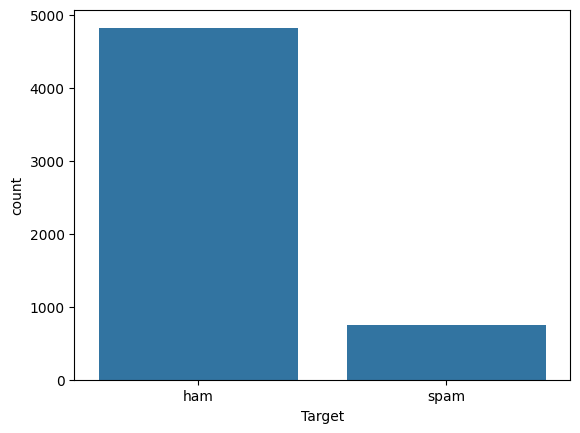

In [160]:
sns.barplot(df['Target'].value_counts())

In [161]:
ham = df[df['Target'] == 'ham'].sample(1000)
spam = df[df['Target'] == 'spam']

In [162]:
df3 = pd.concat([ham, spam], axis=0, ignore_index=True)

df3['Target'].value_counts()

### Data Split

In [163]:
X = df[['Mail']]
y = df['Target']

In [164]:
X.shape,y.shape

((5572, 1), (5572,))

In [165]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [166]:
# print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4457, 1) (4457,) (1115, 1) (1115,)


### Vecotrizing the splits

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)

X_train = cv.fit_transform(X_train['Mail']).toarray()
# X_valid = cv.fit_transform(X_valid['Mail']).toarray()
X_test = cv.fit_transform(X_test['Mail']).toarray()

print(X_train.shape)
print('Vectorization complete')

(4457, 1000)
Vectorization complete


### Model Selection

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [169]:
def train_model(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train,y_train)
        
        # Evaluate the model on the validation set
        accuracy = model.score(X_test, y_test)
        
        print(f'Accuracy % of {model.__class__.__name__}: {accuracy}')
        print('----------------------------------------------')


# Define the list of models
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]

# Train and evaluate the models
train_model(models, X_train, y_train,X_test,y_test)

Accuracy % of GaussianNB: 0.7542600896860987
----------------------------------------------
Accuracy % of MultinomialNB: 0.7704035874439462
----------------------------------------------
Accuracy % of BernoulliNB: 0.8304932735426009
----------------------------------------------


### Model Tunning

In [170]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
bernoulli_nb = MultinomialNB()
grid_search = GridSearchCV(bernoulli_nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Parameters:  {'alpha': 0.1}
Best Cross-Validation Score: 0.98


In [171]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

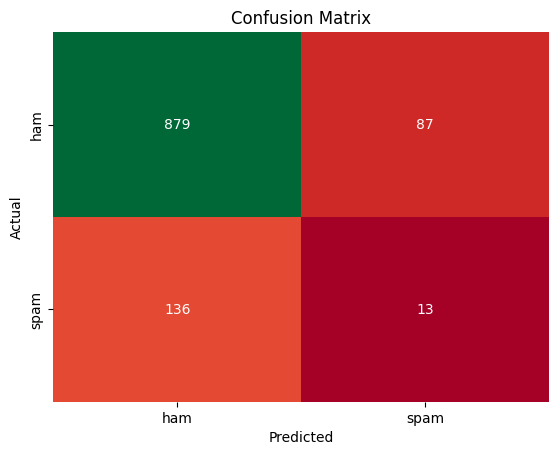

In [172]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [173]:
TN, FP, FN, TP = cm.ravel()
accuracy = (TN + TP) / (TN + FP + FN + TP)
print("Accuracy Score =", format(accuracy))

Accuracy Score = 0.8


In [174]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_true = y_test
precision = precision_score(y_true, y_pred, pos_label='spam')
recall = recall_score(y_true, y_pred, pos_label='spam')
f1 = f1_score(y_true, y_pred, pos_label='spam')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1) # F1 score should be 0.7 or higher to beed termed as good

Precision: 0.13
Recall: 0.087248322147651
F1 Score: 0.10441767068273093


In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print(model)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

MultinomialNB(alpha=0.1)
Cross Validation Scores are [0.97869955 0.98766816 0.98092031 0.98204265 0.97418631]
Average Cross Validation score :0.9807033966974178


In [179]:
# Get user input
print('Enter the review:')
user_input = input()

# Create a DataFrame with a column containing the user input
df_user_input = pd.DataFrame({'text_column': [user_input]})

# Use the CountVectorizer to transform the preprocessed user input
input_data = cv.transform(df_user_input).toarray()

# Predict using the trained model
predicted_class = model.predict(input_data)

# Print the user input and predicted class
print(f"Review: {user_input}")
if predicted_class == 'spam':
    print('The mail is spam')
else:
    print('Not spam')


Enter the review:
Review: Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!
Not spam


In [177]:
gfdsfa
Hey mohan, can we get together to watch footbal game tomorrow?
Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!

SyntaxError: invalid syntax (2952090862.py, line 3)

## Threshold 

In [ ]:
pred_score = model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_valid,pred_score,pos_label='spam')

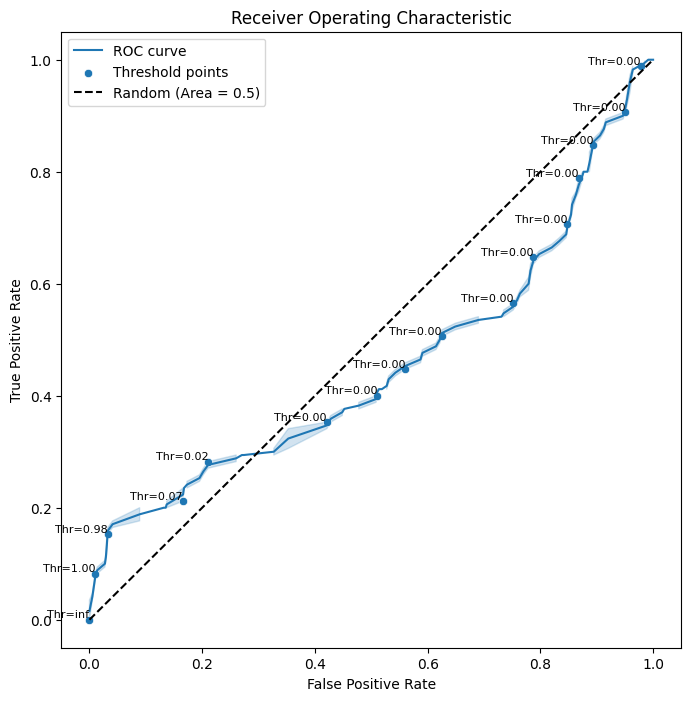

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the data
roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

# Plot ROC curve
plt.figure(figsize=(8, 8))
sns.lineplot(data=roc_data, x='fpr', y='tpr', label='ROC curve')

# Plot threshold points
n = 10
indices = np.arange(len(thresholds)) % n == 0
sns.scatterplot(data=roc_data[indices], x='fpr', y='tpr', label='Threshold points')

# Add text labels for threshold points
for index, row in roc_data[indices].iterrows():
    plt.text(row['fpr'], row['tpr'], f"Thr={row['thresholds']:.2f}", fontsize=8, ha='right', va='bottom')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random (Area = 0.5)')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.9476777600126431


<Axes: xlabel='Predicted', ylabel='Actual'>

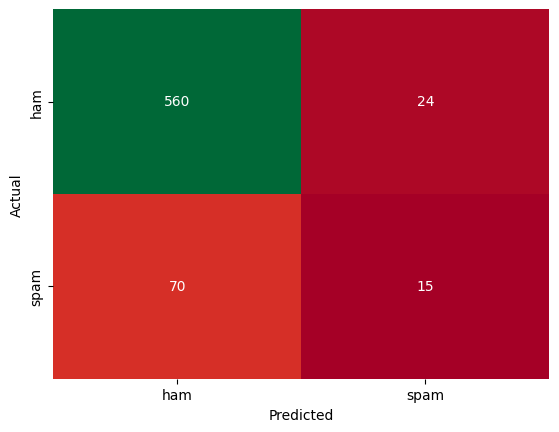

In [ ]:

# Convert predicted probabilities to binary predictions using the optimal threshold
binary_predictions = (pred_score >= optimal_threshold).astype(int)
# Evaluate the performance with the optimal threshold
confusion_matrix = pd.crosstab(y_valid, binary_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)

In [181]:
# Get user input
print('Enter the review:')
user_input = input()

# Create a DataFrame with a column containing the user input
df_user_input = pd.DataFrame({'text_column': [user_input]})

# Use the CountVectorizer to transform the preprocessed user input
input_data = cv.transform(df_user_input).toarray()

# Predict using the trained model
pred_score = model.predict_proba(input_data)

 #print(pred_score2) [[0 , 1]]

if pred_score[0][1] > optimal_threshold:
    print('Not Spam')
else:
    print('spam')


Enter the review:
spam


In [ ]:
pred_score[0][1]

0.00016756348817564012

###### END

##### END